# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [ ]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [ ]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x7f75edbab750>, <__main__.Node at 0x7f75edbab7d0>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [ ]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [ ]:
#############################################################################
# TODO: Find columns with missing values and remove them from the data.#
#############################################################################
# drop columns if there are missing values 
data.dropna(axis=1, inplace=True)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

We will split the dataset to `Training` and `Testing` datasets.

In [ ]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [ ]:
y.shape

(8124,)

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [ ]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    labels = np.unique(data[:,-1], return_counts=True)[1]
    p = (labels/data.shape[0])
    gini = 1-(p**2).sum()

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [ ]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    labels = np.unique(data[:,-1], return_counts=True)[1]
    p = labels/data.shape[0]
    entropy = -np.dot(p,np.log2(p))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [ ]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [ ]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    #gain ratio is relevant only for entropy
    if gain_ratio is True:
        assert impurity_func == calc_entropy

    # extractvalues for that feature from data with labels
    feature_values = data[:,[feature, -1]]

    # for each feature value, group with labels
    grouped_feature_values = feature_values[np.argsort(feature_values[:,0])]

    # split labels and values for the feature into distinct arrays
    split_features_labels = np.split(grouped_feature_values[:,1], np.unique(grouped_feature_values[:,0], return_index = True)[1])[1:]

    # array of impurities for each group
    impurities = np.array([impurity_func(grou[:,None]) for grou in split_features_labels])

    # weighted averages
    probs = (np.unique(grouped_feature_values[:,0], return_counts=True)[1] / grouped_feature_values[:,0].shape[0])

    # goodness of split calculation
    goodness = (impurity_func(data) - np.dot(probs,impurities))

    if gain_ratio is True and goodness > 0.000001:
      goodness /= calc_entropy(feature_values[:,0][:,None])
      
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness    

In [ ]:
print(goodness_of_split(X, 4, calc_entropy, gain_ratio=False))
print(goodness_of_split(X, 1, calc_entropy, gain_ratio=True))

0.49516949727436654
0.011999711708812375


## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [ ]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    def __init__(self, depth, data, feature, feature_value, prediction, impurity):
        self.feature = feature # column index of feature being tested
        self.feature_value = feature_value # value of feature selected from parent
        self.children = [] # children of a node
        self.data = data # data the node holds
        self.prediction = prediction
        self.impurity = impurity
        self.depth = depth # distance from root node

    def add_child(self, node):
        self.children.append(node)

In [ ]:
import queue

def build_tree(data, impurity, gain_ratio=False, min_samples_split=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - min_samples_split: the minimum number of samples required to split an internal node
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """
    root = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    q = queue.Queue()
    depth = 0

    # create the root node with all the samples
    root = DecisionNode(depth=depth, 
                        data=pd.DataFrame(data), 
                        feature=None, 
                        feature_value='root',
                        prediction=None, 
                        impurity=None)

    # insert the node to initilalize a queue
    q.put(root)

    # while there are incomplete nodes on the queue
    while q.qsize() > 0:

      # take node from the queue
      node = q.get()

      #set prediction on a node by majority
      data_y_labels, data_y_counter = np.unique(node.data.to_numpy()[:,-1], return_counts=True)
      node.prediction = data_y_labels[np.argmax(data_y_counter)]

      # if height is greater, stop building tree
      if node.depth >= max_depth: 
        continue

      # check if impurity is close to  0 (perfectly classified)
      node.impurity = impurity(node.data.to_numpy())
      
      # if np.isclose(node.impurity,0): 
      #  continue
      #mark it as complete (make it a leaf)
      if node.impurity == 0: 
        continue

      # if not pure/perfectly classified, find best decision attribute for the node
      attributes_gos = []
      
      # for every feature in the node (not the labels), calculate goodness of split
      for feature in range(node.data.columns.size-1):
        attributes_gos.append(goodness_of_split(node.data.to_numpy(), feature, impurity, gain_ratio))
      
      # if np.isclose(np.max(attributes_gos),0):
      #   continue
      # if max GOS is 0, then it does not differ from its parent so its a leaf
      if np.max(attributes_gos) == 0:
        continue

      # set that best attribute to the node (setting the index)
      node.feature = node.data.columns[np.argmax(attributes_gos)]

      #don't split a node if the number of samples in it is less or equal to the min_samples_split value
      if len(node.data.index) <= min_samples_split:
        continue
      
      # for each value in that attribute, create a new child for the node
      for val in np.unique(node.data[node.feature]):

        # get subset of data filtered for that value
        value_data = node.data[node.data[node.feature] == val]
        value_data = value_data.drop([node.feature], axis = 1)

        # distribute training examples to child for that value
        child = DecisionNode(depth=node.depth+1, 
                             data=value_data, 
                             feature=None, 
                             feature_value=val,
                             prediction=None,
                             impurity=None)

        # add child to node
        node.add_child(child)

        # insert all non empty children to queue
        q.put(child) 

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [ ]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [ ]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    current_node = node
    stop = False

    # while current node has children
    while len(current_node.children)> 0 and stop == False:

      # get the feature for which node splits
      current_split_feature = current_node.feature

      #get all the feature value of children
      child_features = [child.feature_value for child in current_node.children]

      # for each of the children
      for child in current_node.children: 

        # extract feature value for that child
        child_feature_value = child.feature_value

        # if instance val not in child feature vals, flag stop
        if instance[current_split_feature] not in child_features:
          stop = True

        # if child value is equal to the feature for which instance splits
        if instance[current_split_feature] == child_feature_value: 
          current_node = child
          break

    node = current_node

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.prediction

In [ ]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    correct_predictions = 0
    # for each instance
    for instance_row in dataset:

      # get instance prediction
      prediction = predict(node, instance_row)

      # get label for that dataset
      label = instance_row[-1]

      if prediction == label:
        correct_predictions += 1
      
    accuracy = correct_predictions / len(dataset)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [ ]:
#### Your code here ####

gini_train_accuracy = calc_accuracy(tree_gini, X_train)
gini_test_accuracy = calc_accuracy(tree_gini, X_test)

print(f"X_train for Gini: {gini_train_accuracy * 100}%")
print(f"X_test for Gini: {gini_test_accuracy * 100}%")

entropy_train_accuracy = calc_accuracy(tree_entropy, X_train)
entropy_test_accuracy = calc_accuracy(tree_entropy, X_test)

print(f"X_train for Entropy: {entropy_train_accuracy * 100}%")
print(f"X_test for Entropy: {entropy_test_accuracy * 100}%")

split_train_accuracy = calc_accuracy(tree_entropy_gain_ratio, X_train)
split_test_accuracy = calc_accuracy(tree_entropy_gain_ratio, X_test)

print(f"X_train for Split Gain Ratio: {split_train_accuracy * 100}%")
print(f"X_test for Split Gain Ratio: {split_test_accuracy * 100}%")

options = ['Gini', 'Entropy', 'Split Gain Ratio']
best_accuracy = np.max([gini_test_accuracy, entropy_test_accuracy, split_test_accuracy])
best_accuracy_tree = options[np.argmax([gini_test_accuracy, entropy_test_accuracy, split_test_accuracy])]

print(f"The tree that resulted in the best test accuracy was: {best_accuracy_tree} with {best_accuracy*100}%")

X_train for Gini: 99.24503528639423%
X_test for Gini: 77.49876907927128%
X_train for Entropy: 99.40915805022156%
X_test for Entropy: 77.25258493353027%
X_train for Split Gain Ratio: 99.63892991957984%
X_test for Split Gain Ratio: 78.53274249138356%
The tree that resulted in the best test accuracy was: Split Gain Ratio with 78.53274249138356%


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

In [ ]:
#### Your code here ####
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8]
train_accuracies_list = []
test_accuracies_list = []

for value in max_depth_list:
  tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, max_depth=value)
  depth_train_accuracy = calc_accuracy(tree_entropy_gain_ratio, X_train)
  depth_test_accuracy = calc_accuracy(tree_entropy_gain_ratio, X_test)
  train_accuracies_list.append(depth_train_accuracy)
  test_accuracies_list.append(depth_test_accuracy)
  # print ("*")
  # print(value)
  # print(depth_test_accuracy)
  # print(count_nodes(tree_entropy_gain_ratio))
  # print("*")


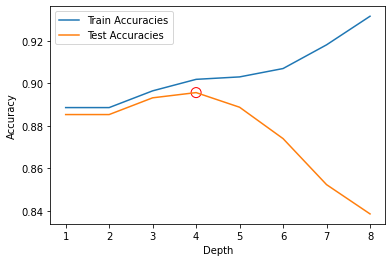

In [ ]:
#from matplotlib import style
#style.use('dark_background')
plt.plot(max_depth_list,train_accuracies_list, label="Train Accuracies")
plt.plot(max_depth_list,test_accuracies_list, label="Test Accuracies")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
best_x_point = max_depth_list[np.argmax(test_accuracies_list)]
best_y_point = np.max(test_accuracies_list)
_ = plt.scatter([best_x_point],[best_y_point], facecolors='none', edgecolors='r' ,s=100)
_ = plt.xticks(max_depth_list)



## Min Samples Split

(15 points)

Consider the following min_samples_split values: [1, 5, 10, 20, 50]. For each value, construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the min_samples_split. Mark the best result on the graph with red circle. (make sure that the x-axis ticks represent the values of min_samples_split)

In [ ]:
#### Your code here ####
min_samples_split = [1, 5, 10, 20, 50]
train_accuracies_list = []
test_accuracies_list = []

for value in min_samples_split:
  tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, min_samples_split=value)
  split_train_accuracy = calc_accuracy(tree_entropy_gain_ratio, X_train)
  split_test_accuracy = calc_accuracy(tree_entropy_gain_ratio, X_test)
  train_accuracies_list.append(split_train_accuracy)
  test_accuracies_list.append(split_test_accuracy)
  # print ("*")
  # print(value)
  # print(split_test_accuracy)
  # print(count_nodes(tree_entropy_gain_ratio))
  # print("*")

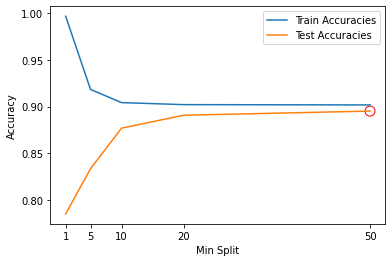

In [ ]:
#from matplotlib import style
#style.use('dark_background')
plt.plot(min_samples_split,train_accuracies_list, label="Train Accuracies")
plt.plot(min_samples_split,test_accuracies_list, label="Test Accuracies")
plt.xlabel("Min Split")
plt.ylabel("Accuracy")
plt.legend()
best_x_point = min_samples_split[np.argmax(test_accuracies_list)]
best_y_point = np.max(test_accuracies_list)
_ = plt.scatter([best_x_point],[best_y_point], facecolors='none', edgecolors='r' ,s=100)
_ = plt.xticks(min_samples_split)


Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_min_samples_split - the best tree according to min_samples_split pruning

In [ ]:
#### Your code here ####
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, max_depth=4)
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, min_samples_split=5)


## Number of Nodes

(5 points)

Complete the function counts_nodes and print the number of nodes in each tree and print the number of nodes of the two trees above

In [ ]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # include node pass in
    count = 1
    # recurisvely iterate over all children
    for child in node.children:
      count += count_nodes(child)
    return count
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

## Print the tree

Complete the function `print_tree`. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [ ]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #print root
    if parent_feature=='ROOT':
        print('  '*depth,f'[ROOT, feature={allFeatures[node.feature]}]')
    #printing non leaf 
    elif (len(node.children) >= 1):
        print('  '*depth,f'[{allFeatures[parent_feature]}={feature_val}, feature={allFeatures[node.feature]}]')
    #printing leafs
    else:
        classes, number_of_instances = np.unique(node.data.to_numpy()[:,-1], return_counts=True)
        if classes.size < 2:
            print('  '*depth,f'[{allFeatures[parent_feature]}={feature_val},leaf]:[{{{classes[0]}:{number_of_instances[0]}}}]')
        else:
            print('  '*depth,f'[{allFeatures[parent_feature]}={feature_val},leaf]:[{{{classes[0]}:{number_of_instances[0]}, {classes[1]}:{number_of_instances[1]}}}]')
    #print children
    for child in node.children:
        print_tree(child, child.depth, node.feature, child.feature_value)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)

In [ ]:
#### Your code here ####
allFeatures = list(data.columns)
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, max_depth=1)
print_tree(tree_entropy_gain_ratio)

 [ROOT, feature=odor]
   [odor=a,leaf]:[{e:273, p:31}]
   [odor=c,leaf]:[{e:10, p:137}]
   [odor=f,leaf]:[{e:170, p:1438}]
   [odor=l,leaf]:[{e:272, p:27}]
   [odor=m,leaf]:[{e:2, p:25}]
   [odor=n,leaf]:[{e:2332, p:344}]
   [odor=p,leaf]:[{e:8, p:175}]
   [odor=s,leaf]:[{e:38, p:380}]
   [odor=y,leaf]:[{e:49, p:382}]
